<h1>Supervised Learning: Linear Regression for skoda used car dataset using Python </h1>

<b>Prepared By:</b>
<br>Suman Biswas
<br>Scientific Officer (Statistics)
<br>Bangladesh Agricultural Research Institute
<br>Gazipur-1701, Bangladesh

<b>This topic covers how to</b>
- load the skoda used car dataset
- perform Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis)
- split the original dataset into the train set (80%) and the test set (20%)
- perform Linear Regression and Predict the 'Price' from the test set 
- show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)
- find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.
- compare the actual and predicted target variable through visualization

#### Import Required Libraries

In [126]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

#### (A) Load Data

In [127]:
# Load data
df=pd.read_csv('skoda.csv')

# Display dataset and it's shape
display((df.head(10)))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
5,Yeti Outdoor,2017,13250,Automatic,47005,Diesel,145,51.4,2.0
6,Superb,2019,15250,Manual,14850,Petrol,145,40.9,1.5
7,Octavia,2019,18950,Automatic,5850,Diesel,150,50.4,2.0
8,Kodiaq,2019,29900,Automatic,2633,Petrol,150,31.4,2.0
9,Octavia,2017,18990,Manual,20000,Petrol,150,43.5,2.0


(6267, 9)


In [128]:
## Display variable names
print(df.columns)

## Checking data types and missing values
df.info()

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   tax           6267 non-null   int64  
 7   mpg           6267 non-null   float64
 8   engineSize    6267 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 440.8+ KB


<b>Observation:</b>
<br>As the variables model, transmission, fuelType are object type we have to convert them in categorical variables. We have to convert the year to categorical variables as well.

#### (B) Label Encoding or One-hot Encoding

Based on the accuracy metrices, the performances of the model was best for the data after One-hot encoding. Therefore, this topic covers only the One-hot encoded variable.

##### Label Encoding

In [129]:
# LE = LabelEncoder()

# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])
# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])

# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')
# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')

# display(df.head(10))
# print(df.info())

#### One-hot Encoding

In [130]:
df = pd.get_dummies(df, drop_first=True)
display(df.head(10))
print(df.info())

,year,price,mileage,tax,mpg,engineSize,model_ Fabia,model_ Kamiq,model_ Karoq,model_ Kodiaq,...,model_ Scala,model_ Superb,model_ Yeti,model_ Yeti Outdoor,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,10550,25250,150,54.3,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2018,8200,1264,145,67.3,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2019,15650,6825,145,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,14000,28431,165,51.4,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2019,18350,10912,150,40.9,1.5,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5,2017,13250,47005,145,51.4,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2019,15250,14850,145,40.9,1.5,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
7,2019,18950,5850,150,50.4,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2019,29900,2633,150,31.4,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,2017,18990,20000,150,43.5,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6267 non-null   int64  
 1   price                   6267 non-null   int64  
 2   mileage                 6267 non-null   int64  
 3   tax                     6267 non-null   int64  
 4   mpg                     6267 non-null   float64
 5   engineSize              6267 non-null   float64
 6   model_ Fabia            6267 non-null   uint8  
 7   model_ Kamiq            6267 non-null   uint8  
 8   model_ Karoq            6267 non-null   uint8  
 9   model_ Kodiaq           6267 non-null   uint8  
 10  model_ Octavia          6267 non-null   uint8  
 11  model_ Rapid            6267 non-null   uint8  
 12  model_ Roomster         6267 non-null   uint8  
 13  model_ Scala            6267 non-null   uint8  
 14  model_ Superb           6267 non-null   

##### Separating the numeric features and target variable

In [131]:
target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

# Print the shape of the dataset features and target variable
print(X.shape, y.shape)

(6267, 22) (6267, 1)


#### (C) Split the original dataset into the train set (80%) and the test set (20%)

In [132]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

print('X_train shape: ', X_train.shape, 'X_test shape: ', X_test.shape, 'y_train shape: ', y_train.shape, 'y_test shape: ', y_test.shape)

X_train shape:  (5013, 22) X_test shape:  (1254, 22) y_train shape:  (5013, 1) y_test shape:  (1254, 1)


#### (D) Perform Linear Regression and Predict the 'Price' from the test set

##### Linear Regression

In [133]:
## Traing with linear regression
model=LinearRegression()
model=model.fit(X_train, y_train)

##### Prediction of the 'Price' from the test set

In [134]:
y_pred=model.predict(X_test)
print(y_pred)

[[11981.09619585]
 [17577.06931395]
 [16006.77855153]
 ...
 [16971.13753639]
 [16370.83871708]
 [13923.56857617]]


#### (E) Linear Regression Coefficients and intercept

In [135]:
## Regression coefficients
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
display("Model coefficients:", coefficients)

## Intercept (y-intercept)
intercepts = model.intercept_
print('Model Intercept: ', intercepts)

'Model coefficients:'

,features,coefficients
0,year,1006.300742
1,mileage,-0.055876
2,tax,-3.706966
3,mpg,-182.366402
4,engineSize,2936.360901
5,model_ Fabia,717.777358
6,model_ Kamiq,4416.419464
7,model_ Karoq,6021.616136
8,model_ Kodiaq,7869.959656
9,model_ Octavia,2404.739001


Model Intercept:  [-2009077.87346176]


- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

#### (F) MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable

In [136]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1326.045620256919
mean absolute percentage error =  0.10641449551450743
mean squared error =  3285929.616505121
root mean squared error =  1812.7133299297825
coefficient of determination =  0.9223172507122517


#### (G) Comparison the actual and predicted target variable through visualization

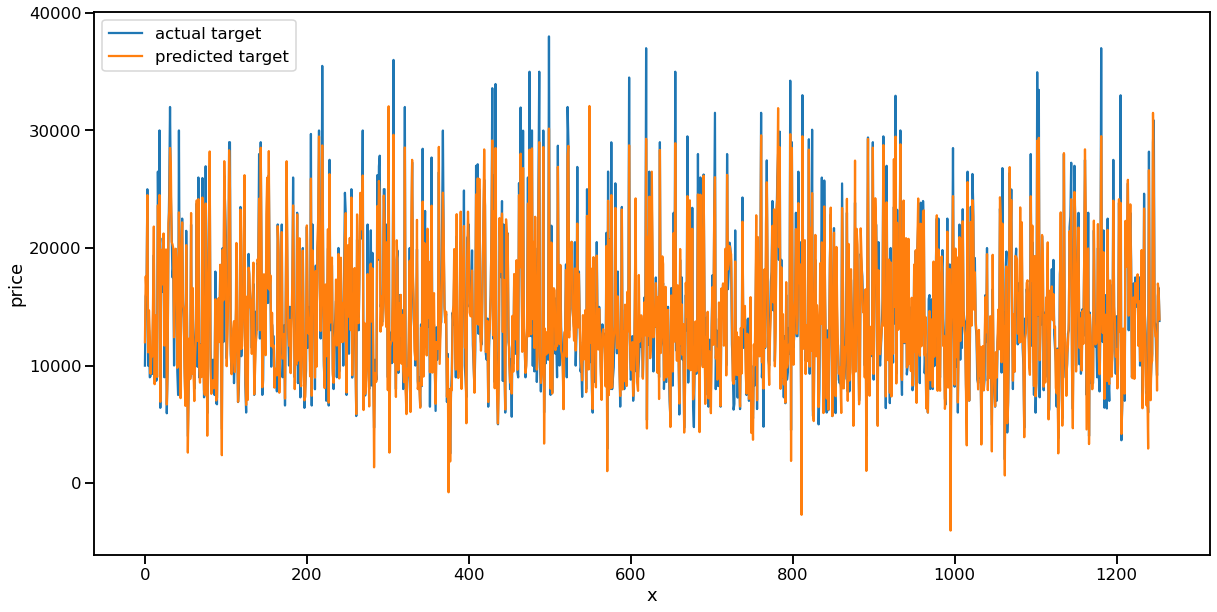

In [137]:
## lineplot
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(20,10))
sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()


# to generate clear images
sns.set_context('talk')

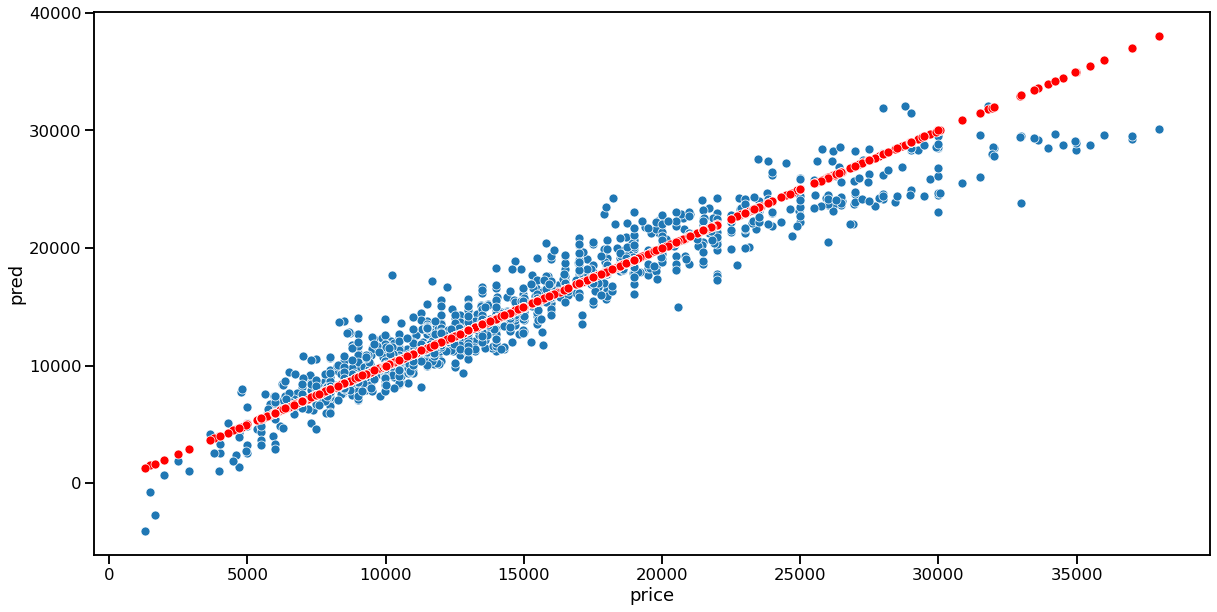

In [138]:
## Scatterplot
plt.figure(figsize=(20,10))
sns.scatterplot(x='price', y='pred', data=y_test)
sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()